# COGS 108 - Final Project 

# Overview

The question is: with an increasing threat from climate change, would the San Diego park system be more affected by things such as pollution, water shortage, etc. Data was collected from 2014 and 2017 to see how pollution had changed over this three year span in the San Diego area. It was found that, in general, pollution went up with clean drinking water going down. From the data, it cannot be said that emissions in the San Diego area have gone up or down due to the limitation of data, but it can be concluded that the San Diego park system is at risk of the effects of climate change and steps must be made in order to preserve them. 

# Name & GitHub

- Name: Shawn Sewell-Snyder
- GitHub Username: shawnss25

# Research Question

With the steady increase in climate change, will the parks be more affected by pollution, groundwater threats, emissions, etc?

## Background and Prior Work

Climate change is becoming a major issue in today's world. It has the potential to cause droughts, raise sea levels, pollute the air and much more. According to census.gov (reference 2), San Diego is seeing a large increase in population. It is assumed that with more people, there will be more CO2 emissions (reference 1), only adding fuel to the climate change fire. With more CO2 emissions, the parks and rec centers in San Diego will be under an even greater threat.

Thankfully, the city of San Diego has recognized this threat of climate change and has created a plan (reference 3) that will help curb the effects of global warming. For example, they want to reduce fuel consumption by 15% each year. Reference 1 shows the studies done which portrays things such as how the coast line would be affected by rising sea levels and the impact on water. Parks rely on water, for example, to keep everything green and prestine looking, and also rely on the coast line not being underwater/erroded by rising sea levels.

References (include links):
- 1) https://www.sandiego.gov/sites/default/files/legacy/environmental-services/pdf/sustainable/2050climate.pdf
- 2) https://www.census.gov/quickfacts/geo/chart/sandiegocitycalifornia/PST045219
- 3) https://www.sandiego.gov/sites/default/files/legacy/environmental-services/sustainable/pdf/action_plan_07_05.pdf

# Hypothesis


I hypothesize that even with an increase in population (reference 2), with the city's climate change plan (reference 3 above), the parks will experience little to no negative effects due to global warming. The city has done their research (reference 1 above) and knows the consequences if they do not act now, hence, the creation of their plan to effectively combat climate change.


# Dataset(s)

- Dataset Name: pollution_older.csv
- Link to the dataset: https://data.ca.gov/dataset/calenviroscreen-2-0
- Number of observations: 29 observations were used

- Dataset Name: pollution_newer.csv
- Link to the dataset: https://data.ca.gov/dataset/calenviroscreen-3-0-results
- Number of observations: 29 observations were used

Both of these datasets are essentially the same, except pollution_older is from 2014 and pollution_newer is from 2017. This was done to show the time difference and how the variables had changed over time. The two data sets have some different things (for example pollution_newer has a column called "ZIP" for zip code that pollution_older doesn't have and pollution_older has a column called "hyperlink" which links to a map which pollution_newer doesn't have). Both datasets will be cleaned and combined into a new dataset for further anaylsis. 

# Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data Cleaning

To start, the data from the two data sets were read in, where the 2014 data was stored in the variable old_data and the 2017 data in new_data. Both data sets include all counties in California, so I narrowed it down to just San Diego county. The new_data dataset had a column for zip codes (which the old_data dataset does not), so I used this to help narrow the location to specifically San Diego rather than the whole county. I searched for the zip codes of San Diego county on google and choose the zip codes 92113, 92101 and 92104 as my sample zip codes as these zip codes encompass parks such as Balboa Park, Waterfront Park, South Embarcadero Park and more. After this, I made it so new_data and old_data shared the same columns and only the columns that were necesary to show for the research question (for example removing the "poverty" column). Then the rows with NaN's were dropped to only see data that was not missing anything.

A function was created (shrink_tract) that kept the last four digits of the census tract number (Census tracts are essentially small districts that can be as small as a couple blocks). The tract number is a large number. Because the tract numbers are all in the San Diego area, the only unique part of the long number is the last four digits. To make analyzing the data easier, it was decided to only keep the last four digits of the tract numbers. 

new_data and old_data were then combined into a new dataframe called combined_dat. The columns were then arranged to show the data from old_data on the left and the new_data data on the right (as can be seen below). This was done to make it easier to compare the data from old_data and new_data, as they are both side by side. 

The data is as clean as needed to be able to carry out this research. The unneeded columns and NaNs were removed, leaving just the numbers in their respective categories. 

In [2]:

# Data from 2014
old_data = pd.read_csv('pollution_older.csv')
# Data from 2017
new_data = pd.read_csv('pollution_newer.csv')

# Make it only for San Diego County
new_data = new_data.loc[new_data['California County'] == 'San Diego']

# Make it so the nearby city is San Diego
new_data = new_data.loc[new_data['Nearby City \n(to help approximate location only)'] == 'San Diego']

# Make it just downtown area of San Diego
new_data = new_data.loc[(new_data['ZIP'] == 92101) | (new_data['ZIP'] == 92113) | (new_data['ZIP'] == 92104)]

# Only display specific columns 
new_data = new_data[['Census Tract','CES 3.0 Score',\
                   'Diesel PM Pctl','Groundwater Threats Pctl',\
                   'Tox. Release Pctl', 'Haz. Waste Pctl', 'Solid Waste Pctl','Pollution Burden Pctl']]

# Make it only for San Diego County
old_data = old_data.loc[old_data['California County'] == 'San Diego']

# Only display specific columns 
old_data = old_data[['Census Tract','CES 2.0 Score',\
                   'Diesel PM Pctl','Groundwater Threats Pctl',\
                   'Tox. Release Pctl', 'Haz. Waste Pctl', 'Solid Waste Pctl','Pollution Burden Pctl']]

# Remove rows with NA data
old_data = old_data.dropna()
new_data = new_data.dropna()

In [3]:
old_data

,Census Tract,CES 2.0 Score,Diesel PM Pctl,Groundwater Threats Pctl,Tox. Release Pctl,Haz. Waste Pctl,Solid Waste Pctl,Pollution Burden Pctl
165,6073005000,59.91,85.01,95.47,81.65,97.59,75.96,91.92
299,6073003601,55.61,77.77,88.42,59.95,87.18,81.49,84.64
370,6073004900,54.23,91.27,93.77,55.00,91.51,72.08,86.06
466,6073003902,52.48,85.39,76.98,57.58,95.96,0.00,76.91
805,6073003901,47.82,85.46,70.84,49.32,75.63,23.19,65.03
...,...,...,...,...,...,...,...,...
7904,6073017053,4.31,25.99,53.33,15.38,0.00,0.00,9.51
7908,6073008102,4.26,9.98,10.03,13.31,0.00,0.00,4.00
7943,6073007907,3.47,29.34,0.00,15.89,0.00,0.00,4.84
7951,6073007301,3.32,37.40,0.00,20.90,0.00,0.00,2.76


In [4]:
new_data

,Census Tract,CES 3.0 Score,Diesel PM Pctl,Groundwater Threats Pctl,Tox. Release Pctl,Haz. Waste Pctl,Solid Waste Pctl,Pollution Burden Pctl
46,6073005000,70.91,99.65,96.79,61.84,97.37,93.61,95.82
78,6073004900,68.27,99.65,96.24,53.75,95.92,92.38,94.20
83,6073003902,67.79,97.08,80.80,78.14,98.37,96.39,94.50
102,6073003601,66.76,94.52,94.36,58.76,95.27,84.51,92.50
304,6073003901,59.42,97.98,74.91,56.14,82.35,84.77,81.28
334,6073005100,58.65,99.65,99.55,44.49,95.48,73.54,91.28
772,6073003603,51.41,97.24,90.75,55.70,46.52,73.54,82.04
908,6073003502,49.67,87.28,39.42,50.09,90.70,52.84,69.65
1100,6073003602,47.45,90.64,41.10,51.98,51.14,57.18,54.13
1173,6073003501,46.82,87.28,28.72,46.20,60.50,36.52,62.94


In [5]:
# Get last 4 digits of tract number
def shrink_tract(tract):
    tract = tract % 10000
    return tract

In [6]:

# Merge new_data with old_data
combined_dat = new_data.set_index('Census Tract').join(old_data.set_index('Census Tract'), rsuffix='_old', lsuffix='_new')

# Rearrange columns to show old and new data
combined_dat = combined_dat[['CES 2.0 Score', 'CES 3.0 Score',\
                            'Diesel PM Pctl_old', 'Diesel PM Pctl_new',\
                            'Groundwater Threats Pctl_old', 'Groundwater Threats Pctl_new', 'Tox. Release Pctl_old',\
                            'Tox. Release Pctl_new', 'Haz. Waste Pctl_old', 'Haz. Waste Pctl_new', 'Solid Waste Pctl_old',\
                            'Solid Waste Pctl_new', 'Pollution Burden Pctl_old', 'Pollution Burden Pctl_new']]

# Reset index 
combined_dat = combined_dat.reset_index()

# Apply def
combined_dat['Census Tract'] = combined_dat['Census Tract'].apply(shrink_tract)
combined_dat

,Census Tract,CES 2.0 Score,CES 3.0 Score,Diesel PM Pctl_old,Diesel PM Pctl_new,Groundwater Threats Pctl_old,Groundwater Threats Pctl_new,Tox. Release Pctl_old,Tox. Release Pctl_new,Haz. Waste Pctl_old,Haz. Waste Pctl_new,Solid Waste Pctl_old,Solid Waste Pctl_new,Pollution Burden Pctl_old,Pollution Burden Pctl_new
0,5000,59.91,70.91,85.01,99.65,95.47,96.79,81.65,61.84,97.59,97.37,75.96,93.61,91.92,95.82
1,4900,54.23,68.27,91.27,99.65,93.77,96.24,55.00,53.75,91.51,95.92,72.08,92.38,86.06,94.20
2,3902,52.48,67.79,85.39,97.08,76.98,80.80,57.58,78.14,95.96,98.37,0.00,96.39,76.91,94.50
3,3601,55.61,66.76,77.77,94.52,88.42,94.36,59.95,58.76,87.18,95.27,81.49,84.51,84.64,92.50
4,3901,47.82,59.42,85.46,97.98,70.84,74.91,49.32,56.14,75.63,82.35,23.19,84.77,65.03,81.28
5,5100,47.81,58.65,91.27,99.65,99.18,99.55,44.32,44.49,89.96,95.48,71.76,73.54,82.27,91.28
6,3603,46.57,51.41,75.40,97.24,84.60,90.75,58.28,55.70,50.42,46.52,81.49,73.54,73.43,82.04
7,3502,43.21,49.67,79.77,87.28,24.08,39.42,53.22,50.09,78.60,90.70,23.19,52.84,59.85,69.65
8,3602,41.74,47.45,79.17,90.64,41.29,41.10,55.79,51.98,50.42,51.14,63.94,57.18,49.16,54.13
9,3501,37.81,46.82,79.75,87.28,26.33,28.72,44.40,46.20,76.39,60.50,0.00,36.52,56.79,62.94


# Data Analysis & Results

The CES 2.0 (2014) and 3.0 (2017) data are being compared. 

Data intepreted from the cal-enviro-screen-data-dictionary (https://data.ca.gov/dataset/calenviroscreen-2-0/resource/cb5fe61f-a1af-4e53-83e2-fd3e19d0e707)

It appears that most of the distributions resemble either normal or bimodal distributions. It cannot be easily determined whether there is a relationship between variables, however, there are variables such as groundwater threats, hazardous waste, and solid waste that have similar distributions/graphs. For the most part, there did not seem to be outliers. It was also found that there were mostly increases in the variables between CES 2.0 and CES 3.0. 

The CES score is the CalEnviroScreen Score, Pollution Score multiplied by Population Characteristics Score. It is interpreted that the higher the score, the increase in overall pollution. This shows that there has been an increase in score between CES 2.0 and 3.0. The CES 2.0 score follows more of a Bimodal distribution, whereas CES 3.0 has more of a normal distribution.

CES 3.0 Score is greater than the CES 2.0 Score in (25/29) of the Census Tracts


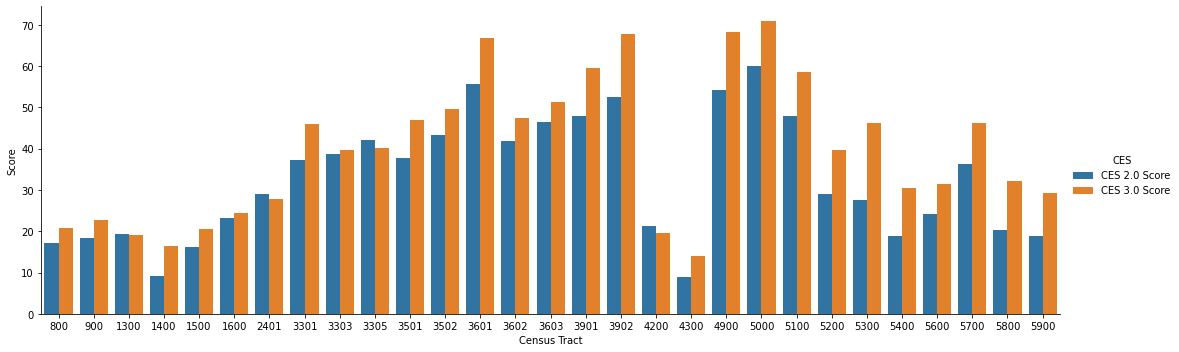

In [7]:
df = combined_dat[['Census Tract', 'CES 2.0 Score', 'CES 3.0 Score']].copy()
df = df.melt('Census Tract', var_name='CES', value_name='Score')
g = sns.catplot(x='Census Tract', y='Score', hue='CES',data=df, kind='bar', height=5, aspect=3)


print('CES 3.0 Score is greater than the CES 2.0 Score in (' + str(len(combined_dat.loc[combined_dat['CES 2.0 Score'] < combined_dat['CES 3.0 Score']])) + '/29) of the Census Tracts')

[Text(0, 0.5, 'Frequency')]

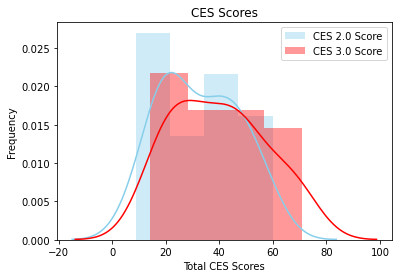

In [8]:
ax = sns.distplot(combined_dat['CES 2.0 Score'], color='skyblue', label='CES 2.0 Score')
sns.distplot(combined_dat['CES 3.0 Score'], color='red', label='CES 3.0 Score', axlabel='Total CES Scores')
plt.legend()
ax.set_title('CES Scores')
ax.set(ylabel='Frequency')

It's interpreted that the Diesel Particulate Matter Percentile has increased between CES 2.0 and 3.0, meaning that Diesel Particulate Matter emissions from on-road aand non-road sources had increased. Both 2.0 and 3.0 resemble bimodal distributions.

Diesel PM Percentile in CES 3.0 is greater than the CES 2.0 Diesel PM Percentile in (21/29) of the Census Tracts


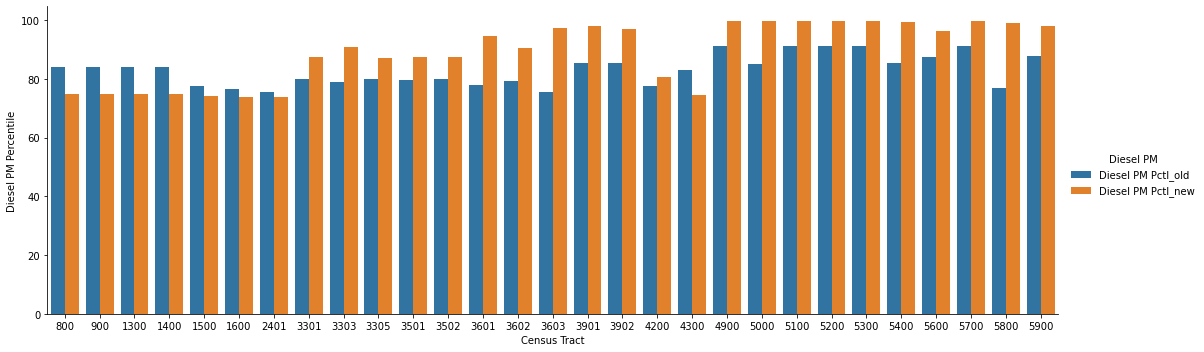

In [9]:
df = combined_dat[['Census Tract', 'Diesel PM Pctl_old', 'Diesel PM Pctl_new']].copy()
df = df.melt('Census Tract', var_name='Diesel PM', value_name='Diesel PM Percentile')
g = sns.catplot(x='Census Tract', y='Diesel PM Percentile', hue='Diesel PM',data=df, kind='bar', height=5, aspect=3)
print('Diesel PM Percentile in CES 3.0 is greater than the CES 2.0 Diesel PM Percentile in (' + str(len(combined_dat.loc[combined_dat['Diesel PM Pctl_old'] < combined_dat['Diesel PM Pctl_new']])) + '/29) of the Census Tracts')

[Text(0, 0.5, 'Frequency')]

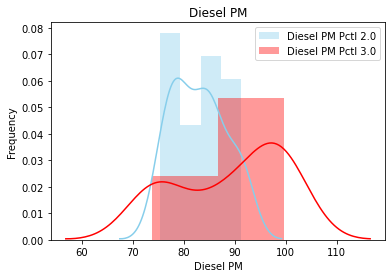

In [10]:
ax = sns.distplot(combined_dat['Diesel PM Pctl_old'], color='skyblue', label='Diesel PM Pctl 2.0')
sns.distplot(combined_dat['Diesel PM Pctl_new'], color='red', label='Diesel PM Pctl 3.0', axlabel='Diesel PM')
plt.legend()
ax.set_title('Diesel PM')
ax.set(ylabel='Frequency')

Groundwater threats, sum of weighted GeoTracker leaking underground storage tank sites  within buffered distances to populated blocks of census tracts. This shows that there isn't much change in the percentile ranking between CES 2.0 and 3.0 but rather a slight increase in frequency for groundwater threats. Both 2.0 and 3.0 mostly resemble bimodal distributions.

Groundwater Threats Percentile in CES 3.0 is greater than the CES 2.0 Groundwater Threats Percentile in (21/29) of the Census Tracts


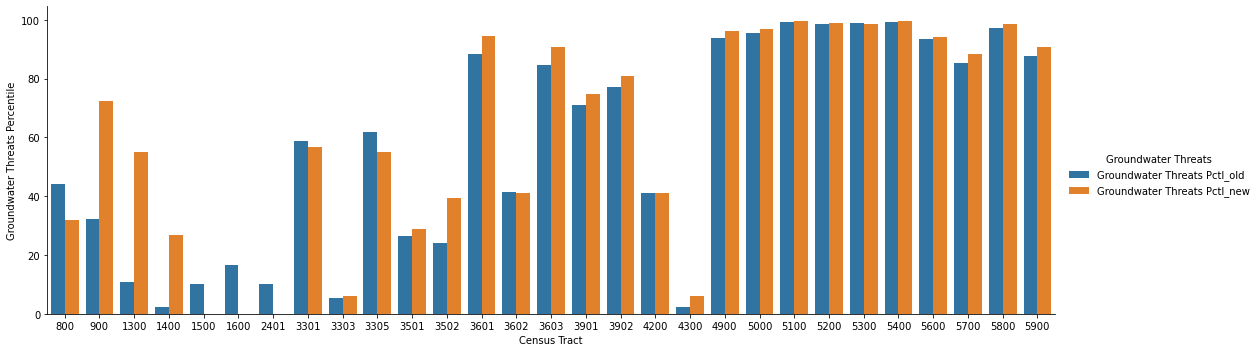

In [11]:
df = combined_dat[['Census Tract', 'Groundwater Threats Pctl_old', 'Groundwater Threats Pctl_new']].copy()
df = df.melt('Census Tract', var_name='Groundwater Threats', value_name='Groundwater Threats Percentile')
g = sns.catplot(x='Census Tract', y='Groundwater Threats Percentile', hue='Groundwater Threats',data=df, kind='bar', height=5, aspect=3)
print('Groundwater Threats Percentile in CES 3.0 is greater than the CES 2.0 Groundwater Threats Percentile in (' + str(len(combined_dat.loc[combined_dat['Groundwater Threats Pctl_old'] < combined_dat['Groundwater Threats Pctl_new']])) + '/29) of the Census Tracts')

[Text(0, 0.5, 'Frequency')]

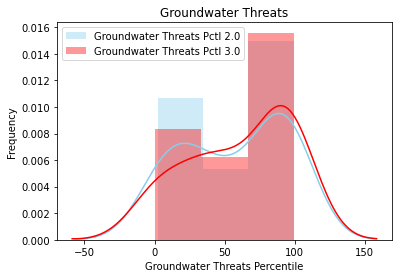

In [12]:
ax = sns.distplot(combined_dat['Groundwater Threats Pctl_old'], color='skyblue', label='Groundwater Threats Pctl 2.0')
sns.distplot(combined_dat['Groundwater Threats Pctl_new'], color='red', label='Groundwater Threats Pctl 3.0', axlabel='Groundwater Threats Percentile')
plt.legend()
ax.set_title('Groundwater Threats')
ax.set(ylabel='Frequency')

Toxicity-weighted concentrations of modeled chemical releases to air from facility emissions and off-site incineration (from RSEI). This shows that there seems to be a right skew for both CES 2.0 and 3.0, however, it seems that there has been an increase between CES 2.0 and 3.0 of toxic release.

Toxic Release Percentile in CES 3.0 is greater than the CES 2.0 Toxic Release Percentile in (22/29)
of the Census Tracts


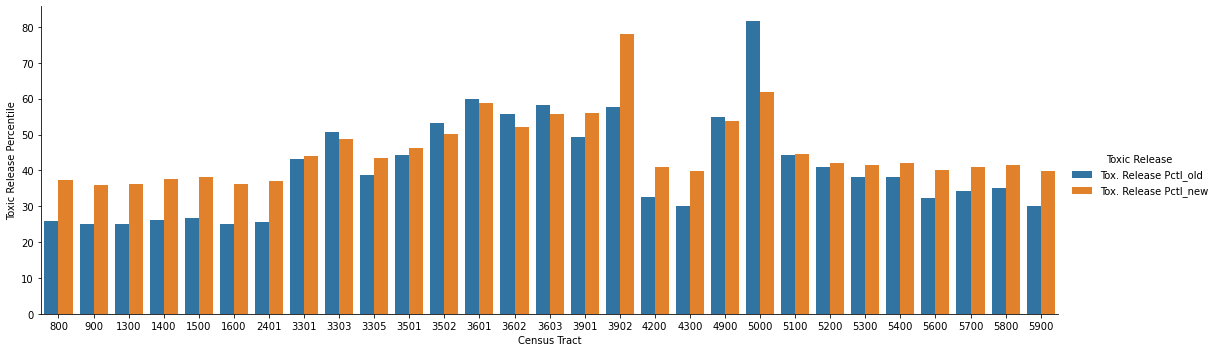

In [13]:
df = combined_dat[['Census Tract', 'Tox. Release Pctl_old', 'Tox. Release Pctl_new']].copy()
df = df.melt('Census Tract', var_name='Toxic Release', value_name='Toxic Release Percentile')
g = sns.catplot(x='Census Tract', y='Toxic Release Percentile', hue='Toxic Release',data=df, kind='bar', height=5, aspect=3)
print('Toxic Release Percentile in CES 3.0 is greater than the CES 2.0 Toxic Release Percentile in (' + str(len(combined_dat.loc[combined_dat['Tox. Release Pctl_old'] < combined_dat['Tox. Release Pctl_new']])) + '/29)\nof the Census Tracts')

[Text(0, 0.5, 'Frequency')]

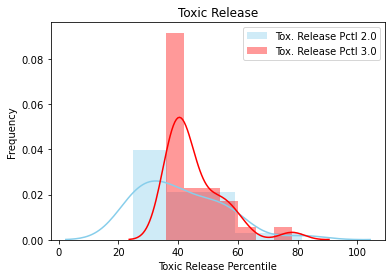

In [14]:
ax = sns.distplot(combined_dat['Tox. Release Pctl_old'], color='skyblue', label='Tox. Release Pctl 2.0')
sns.distplot(combined_dat['Tox. Release Pctl_new'], color='red', label='Tox. Release Pctl 3.0', axlabel='Toxic Release Percentile')
plt.legend()
ax.set_title('Toxic Release')
ax.set(ylabel='Frequency')

Sum of weighted hazardous waste facilities and large quantity generators within buffered distances to populated blocks of census tracts. It appears that there is a slight increase in hazardous waste, as the percentile between CES 2.0 and 3.0 has generally increased. Both 2.0 and 3.0 seems to have bimodal distributions.

Hazardous Waste Percentile in CES 3.0 is greater than the CES 2.0 Hazardous Waste Percentile in (20/29)
of the Census Tracts


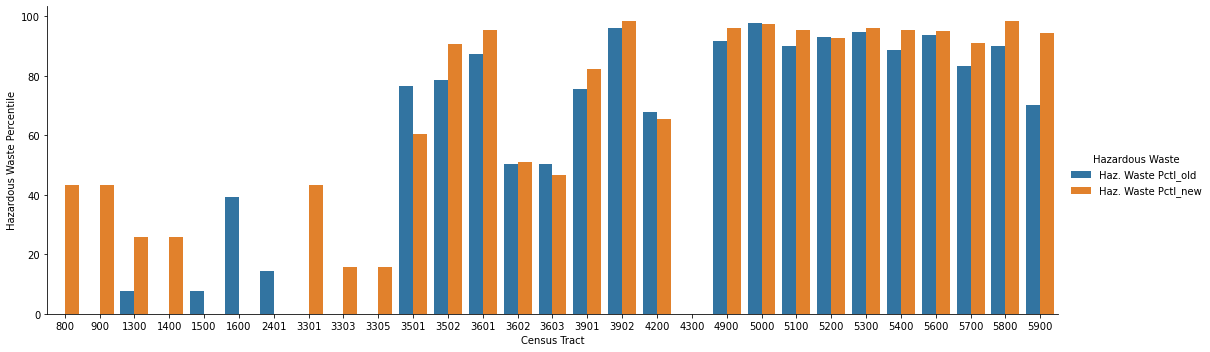

In [15]:
df = combined_dat[['Census Tract', 'Haz. Waste Pctl_old', 'Haz. Waste Pctl_new']].copy()
df = df.melt('Census Tract', var_name='Hazardous Waste', value_name='Hazardous Waste Percentile')
g = sns.catplot(x='Census Tract', y='Hazardous Waste Percentile', hue='Hazardous Waste',data=df, kind='bar', height=5, aspect=3)
print('Hazardous Waste Percentile in CES 3.0 is greater than the CES 2.0 Hazardous Waste Percentile in (' + str(len(combined_dat.loc[combined_dat['Haz. Waste Pctl_old'] < combined_dat['Haz. Waste Pctl_new']])) + '/29)\nof the Census Tracts')

[Text(0, 0.5, 'Frequency')]

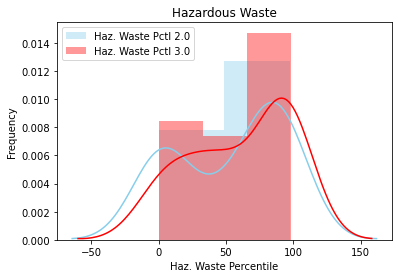

In [16]:
ax = sns.distplot(combined_dat['Haz. Waste Pctl_old'], color='skyblue', label='Haz. Waste Pctl 2.0')
sns.distplot(combined_dat['Haz. Waste Pctl_new'], color='red', label='Haz. Waste Pctl 3.0', axlabel='Haz. Waste Percentile')
plt.legend()
ax.set_title('Hazardous Waste')
ax.set(ylabel='Frequency')

This shows the amount of solid waste. Sum of weighted solid waste sites and facilities (SWIS) within  buffered distances to populated blocks of census tracts. It is interepreted that the higher the number, the more solid waste. This shows that there is a general increase in the solid waste percentile between CES 2.0 and 3.0. Both 2.0 and 3.0 appear to show bimodal distributions.

Solid Waste Percentile in CES 3.0 is greater than the CES 2.0 Solid Waste Percentile in (17/29)
of the Census Tracts


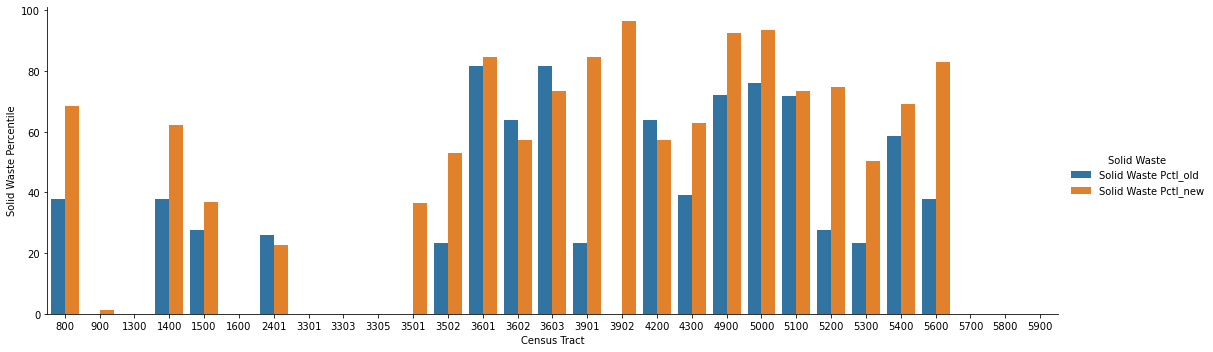

In [17]:
df = combined_dat[['Census Tract', 'Solid Waste Pctl_old', 'Solid Waste Pctl_new']].copy()
df = df.melt('Census Tract', var_name='Solid Waste', value_name='Solid Waste Percentile')
g = sns.catplot(x='Census Tract', y='Solid Waste Percentile', hue='Solid Waste', data=df, kind='bar', height=5, aspect=3)

print('Solid Waste Percentile in CES 3.0 is greater than the CES 2.0 Solid Waste Percentile in (' + str(len(combined_dat.loc[combined_dat['Solid Waste Pctl_old'] < combined_dat['Solid Waste Pctl_new']])) + '/29)\nof the Census Tracts')

[Text(0, 0.5, 'Frequency')]

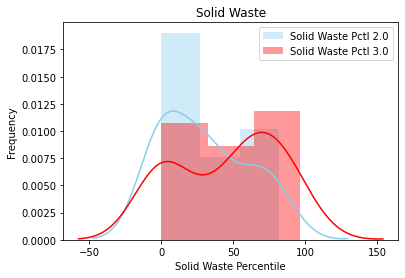

In [18]:
ax = sns.distplot(combined_dat['Solid Waste Pctl_old'], color='skyblue', label='Solid Waste Pctl 2.0')
sns.distplot(combined_dat['Solid Waste Pctl_new'], color='red', label='Solid Waste Pctl 3.0', axlabel='Solid Waste Percentile')
plt.legend()
ax.set_title('Solid Waste')
ax.set(ylabel='Frequency')

Pollution burden which is the average of percentiles from the Pollution Burden indicators with a half weighting for the Environmental Effects indicators. It is interpreted that a higher number means higher level of pollution burden. It appears that the pollution burden has increased between CES 2.0 and 3.0. CES 2.0 seems to have a more normal distribution whereas 3.0 has one closer to bimodal.

Pollution Burden Percentile in CES 3.0 is greater than the CES 2.0 Pollution Burden Percentile in (25/29)
of the Census Tracts


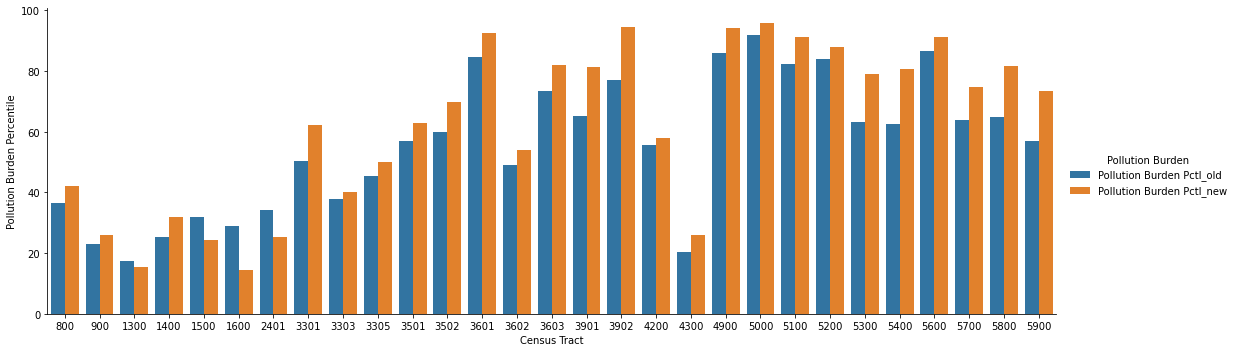

In [19]:
df = combined_dat[['Census Tract', 'Pollution Burden Pctl_old', 'Pollution Burden Pctl_new']].copy()
df = df.melt('Census Tract', var_name='Pollution Burden', value_name='Pollution Burden Percentile')
g = sns.catplot(x='Census Tract', y='Pollution Burden Percentile', hue='Pollution Burden', data=df, kind='bar', height=5, aspect=3)
print('Pollution Burden Percentile in CES 3.0 is greater than the CES 2.0 Pollution Burden Percentile in (' + str(len(combined_dat.loc[combined_dat['Pollution Burden Pctl_old'] < combined_dat['Pollution Burden Pctl_new']])) + '/29)\nof the Census Tracts')

[Text(0, 0.5, 'Frequency')]

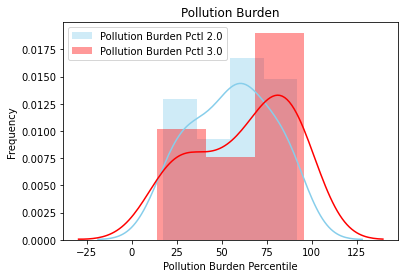

In [20]:
ax = sns.distplot(combined_dat['Pollution Burden Pctl_old'], color='skyblue', label='Pollution Burden Pctl 2.0')
sns.distplot(combined_dat['Pollution Burden Pctl_new'], color='red', label='Pollution Burden Pctl 3.0', axlabel='Pollution Burden Percentile')
plt.legend()
ax.set_title('Pollution Burden')
ax.set(ylabel='Frequency')

# Ethics & Privacy

There has been no detected privacy issues with this research. No personal data was used in the datasets. The only potential ethical concern would be based upon how the data was collected that was used in this research. For example, the people collecting the data may purposefully added/removed information from the data set to make the data appear worse/better than it actually is. Besides this, there are no other ethical concerns.

# Conclusion & Discussion

After doing the data analysis, it appears that there has been an increase in overall threat to the San Diego parks system. Generally, it seems that from 2014 to 2017: solid waste, diesel consumption, toxic release, hazardous waste, pollution burden, ground water threats and other climate change enabling factors have gone up. From reference 3, the action plan of 2005 to reduce factors that increase climate change seems to not be working. However, this does not necesarilly prove that CO2 emissions were increased. It just shows that contributing factors of CO2 emissions have increased. 

The biggest limitation that was found was having all the data needed. Ideally, it would have been beneficial having the data on CO2 emissions and specific population information to use as an indicator in regards to the implementation of the 2005 plan and having the data provided being more up to date (since the "newer data" is 2017). Having the data given in the CES 2.0 and 3.0 datasets, it helps give an idea as to what the carbon emissions may be like, but it does not tell us if there has actually been an increase in emissions or not. Because of this, it is hard to reject or fail to reject the hypothesis due to the lack of CO2 data, however, it can be concluded that the level of pollution has increased which could mean that emissions have gone up. It would be recommended that the Parks and Rec system of San Diego continues, for example, keeping the parks free of trash, maintaining clean water, and limiting CO2 emissions by adding more trash cans, hiring more people to maintain the parks, protecting clean water lines from potential water-polluting threats, and using recycled material and water as much as possible.

The impact of this work on society is quite large. Knowing what we are doing as a collective group that is contributing to climate change can help us alter our actions so that we can perserve the Earth. Seeing data like this is eye-opening to the fact that we need to change what we are doing to put ourselves on the right path. From the data between 2014 and 2017, it was shown that things have been getting worse (at least in the San Diego area) in regards to pollution and emissions. Knowing this, we can take the next appropriate steps to reduce our carbon footprint and change the path that we are currently on.  